## Aakriti Banjara
## Group : CE(IV/I)

### Getting to know TensorFlow

We will learn about TensorFlow to build deep learning models from scratch. TensorFlow is an open source software library from Google, which is extensively used for numerical computation.

To install TensorFlow we need to type pip install tensorflow:

To check the successful installation of TensorFlow check by running:

In [10]:
# Importing TensorFlow
import tensorflow as tf
import numpy as numpy

# Checking TensorFlow version
print(f"TensorFlow Version: {tf.__version__}")

# Creating a TensorFlow constant
hello = tf.constant("Hello, TensorFlow!")

# Printing the constant
print(hello)

TensorFlow Version: 2.17.0
Tensor("Const:0", shape=(), dtype=string)


### Understanding computational graphs and sessions
In TensorFlow, every computation is represented by a data flow graph, also known as a computational graph, where a node represents operations, such as addition or multiplication, and an edge represents tensors.


In [11]:
x = 2
y = 4
z = tf.add(x, y, name='Add')

The computational graph for the preceding code would look like the

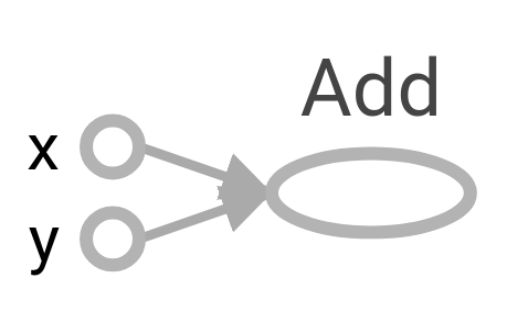
A computational graph helps us to understand the network architecture when we work on building a really complex neural network. For instance, let's consider a simple layer,

**h = Relu(WX + b)**.
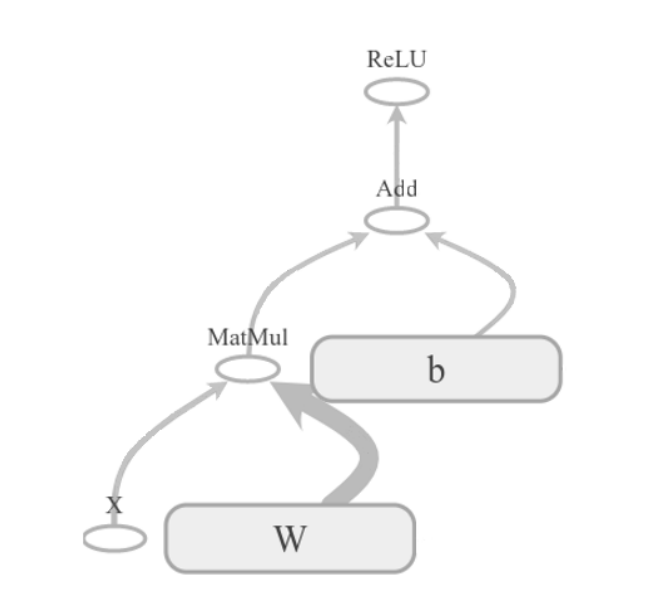

**Direct Dependency**: Here, we have the b node, the input of which is dependent on the output of the a node

In [12]:
a = tf.multiply(8,5)
b = tf.multiply(a,1)

**Indirect dependency**: When the b node doesn't depend on the a node for its input, it is called indirect dependency.

In [13]:
a = tf.multiply(8,5)
b = tf.multiply(4,3)

A TensorFlow graph can be created using tf.Graph(), as follows:

In [14]:
graph = tf.Graph()
with graph.as_default():
  z = tf.add(x, y, name='Add')

If we want to clear the default graph (that is, if we want to clear the previously defined variables and operations), then we can do that using:

In [15]:
# tf.reset_default_graph()

### Sessions

A TensorFlow session can be created using tf.Session(), as shown in the
following code, and it will allocate memory for storing the current value of
the variable. TensorFlow 2.x has eager execution enabled by default, so you don't need to create a session to run computations.

In [3]:
sess = tf.compat.v1.Session() # To create a session

In [16]:
a = tf.multiply(3,3)
print(a)

Tensor("Mul_5:0", shape=(), dtype=int32)


If we were using Tensorflow 1.x, we would have to use sessions as below:

In [17]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
a = tf.multiply(3, 3)

# Create a session in TensorFlow 2.x using compat.v1
with tf.compat.v1.Session() as sess:
    result = sess.run(a)
    print(result)

9


### Variables, constants, and placeholders

Variables, constants, and placeholders are fundamental elements of
TensorFlow

#### Variables

Variables are containers used to store values. Variables are used as input to
several other operations in a computational graph. A variable can be created
using the tf.Variable() function, as shown in the following code:

In [18]:
x = tf.Variable(13)

# Let's create a variable called W, using tf.Variable(), as follows:

W = tf.Variable(tf.random.normal([500, 111], stddev=0.35), name="weights")


It is used to set the name of the variable in the computational graph. So, in the preceding code, Python saves the variable as W but in the TensorFlow graph,
it will be saved as weights.

In [1]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
x = tf.Variable(13)
print(x.numpy()) 
# Define a matrix variable with random normal values
W = tf.Variable(tf.random.normal([500, 111], stddev=0.35), name="weights")
print(f"W: {W.shape}")
#W2 = tf.Variable(W.numpy(), name="weights_2")
W2 = tf.Variable(W.read_value(), name="weights_2")
print(f"W2 shape: {W2.shape}, W2 value: {W2.numpy()}")
W3 = tf.Variable(tf.random.normal(shape=[500, 111], stddev=0.35), name='weights_3')

# Print the shape and value of the variable
print(f"W3 shape: {W3.shape}, W3 value: {W3.numpy()}")


13
W: (500, 111)
W2 shape: (500, 111), W2 value: [[ 0.04800019  0.513354   -0.04828357 ... -0.13067916 -0.33885148
   0.23975156]
 [ 0.08707947  0.6134363  -0.01792358 ...  0.17873444 -0.10668182
  -0.09739209]
 [-0.19355437  0.19546238 -0.3417262  ... -0.33105463 -0.29739484
  -0.1887346 ]
 ...
 [-0.26919538 -0.16937603  0.43098187 ...  0.32027438 -0.42276493
   0.39562356]
 [ 0.15603489 -0.34098694 -0.26878795 ... -0.12493178 -0.47097772
  -0.4299218 ]
 [ 0.08887352 -0.08261662  0.8615394  ...  0.15648313  0.25163487
   0.097729  ]]
W3 shape: (500, 111), W3 value: [[-5.65322340e-02 -1.69053912e-01  1.42762735e-01 ...  1.95941120e-01
   3.03150922e-01  4.16673452e-01]
 [ 3.36469978e-01 -2.53625542e-01 -9.63928644e-03 ... -1.26323728e-02
  -6.50404841e-02 -1.81534648e-01]
 [-4.03843559e-02  1.57598624e-04  1.44402891e-01 ... -1.32331982e-01
   2.70896316e-01  1.66564852e-01]
 ...
 [-1.63782835e-01  1.60970181e-01  4.14215952e-01 ...  5.84821939e-01
  -1.44491181e-01  1.12371575e-02]
 

In [2]:
tf.compat.v1.enable_eager_execution()


z = tf.Variable(1212)

print(z.numpy())


1212


#### Constants

Constants, unlike variables, cannot have their values changed. That is,
constants are immutable. Once they are assigned values, they cannot be
changed throughout. We can create constants using the tf.constant(), as shown
in the following code:

In [4]:
x = tf.constant(13)

print(x.numpy())

13


#### Placeholders and feed dictionaries

We can think of placeholders as variables, where we only define the type and
dimension, but do not assign the value. Values for the placeholders will be
fed at runtime. We feed the data to the computational graphs using
placeholders. Placeholders are defined with no values.

In [12]:
tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder("float", shape=None)


**tf.placeholder()** has been removed because TensorFlow now operates in eager execution mode by default. This means that you no longer need to define placeholders or create sessions to execute computations.

### Introducing TensorBoard

TensorBoard is TensorFlow's visualization tool, which can be used to
visualize a computational graph. It can also be used to plot various
quantitative metrics and the results of several intermediate calculations.

In [38]:
%load_ext tensorboard


Let's build a basic computational graph and visualize it in TensorBoard. Let's
say we have four variables, shown as follows:

In [68]:
import tensorflow as tf

# Define a function to wrap the computation into a graph
@tf.function
def compute_operations():
    x = tf.constant(1, name='x')
    y = tf.constant(1, name='y')
    a = tf.constant(3, name='a')
    b = tf.constant(3, name='b')

    # Define operations
    prod1 = tf.multiply(x, y, name='prod1')
    prod2 = tf.multiply(a, b, name='prod2')
    sum_result = tf.add(prod1, prod2, name='sum')

    return sum_result

# Use TensorBoard for logging
logdir = "./graphs"
writer = tf.summary.create_file_writer(logdir)

# Log the computation graph
with writer.as_default():
    tf.summary.trace_on(graph=True, profiler=False)
    result = compute_operations()  # Run the function to capture the graph
    tf.summary.scalar('sum', result, step=0)
    tf.summary.trace_export(name="graph_trace", step=0)
    tf.summary.trace_off()

# To view the graph in TensorBoard, use:
# tensorboard --logdir=./graphs


In the TensorBoard panel, under the GRAPHS tab, you can see the
computational graph:

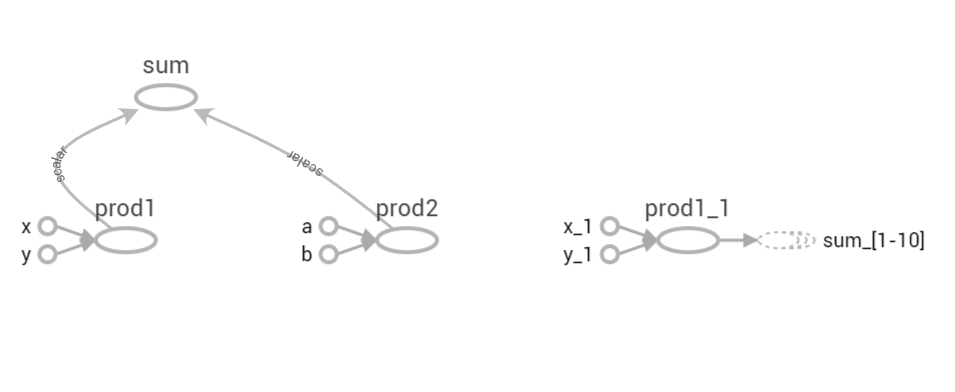

All of the operations we have defined are clearly shown in
the graph

### Creating a name scope

Scoping is used to reduce complexity and helps us to better understand a
model by grouping related nodes together. Having a name scope helps us to
group similar operations in a graph.

In [69]:
import tensorflow as tf

# Disable eager execution to use TensorFlow 2.x in graph mode
tf.compat.v1.disable_eager_execution()

# Create a name scope for better graph visualization
with tf.name_scope("Inputs"):
    x = tf.constant(1, name='x')
    y = tf.constant(1, name='y')
    a = tf.constant(3, name='a')
    b = tf.constant(3, name='b')

# Group multiplication operations
with tf.name_scope("Products"):
    with tf.name_scope("prod1"):
        prod1 = tf.multiply(x,y,name='prod1')
    with tf.name_scope("prod2"):
        prod2 = tf.multiply(a,b,name='prod2')


# Sum the results of the products
with tf.name_scope("Summation"):
    sum_result = tf.add(prod1, prod2, name='sum')

# Start a TensorFlow session to run the graph
with tf.compat.v1.Session() as sess:
    # Define a writer for TensorBoard logging
    writer = tf.compat.v1.summary.FileWriter(logdir='./improved', graph=sess.graph)

    # Initialize variables if any (not needed for this example, but for completeness)
    sess.run(tf.compat.v1.global_variables_initializer())

    # Run the session to calculate the sum
    result = sess.run(sum_result)
    print(f"Sum result: {result}")

# Close the writer when done
writer.close()

# Instructions for running TensorBoard:
# Open a terminal and run the following command:
# tensorboard --logdir=./improved_graphs



Sum result: 10


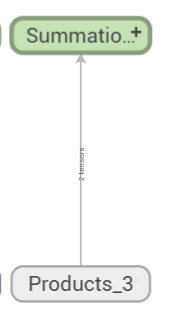

Once we double-click on the nodes, we can see how the computation is
happening. As you can see, the prod1 and prod2 nodes are grouped under the
Product scope, and their results are sent to the sum node, where they will be
added. You can see how the prod1 and prod2 nodes compute their value:

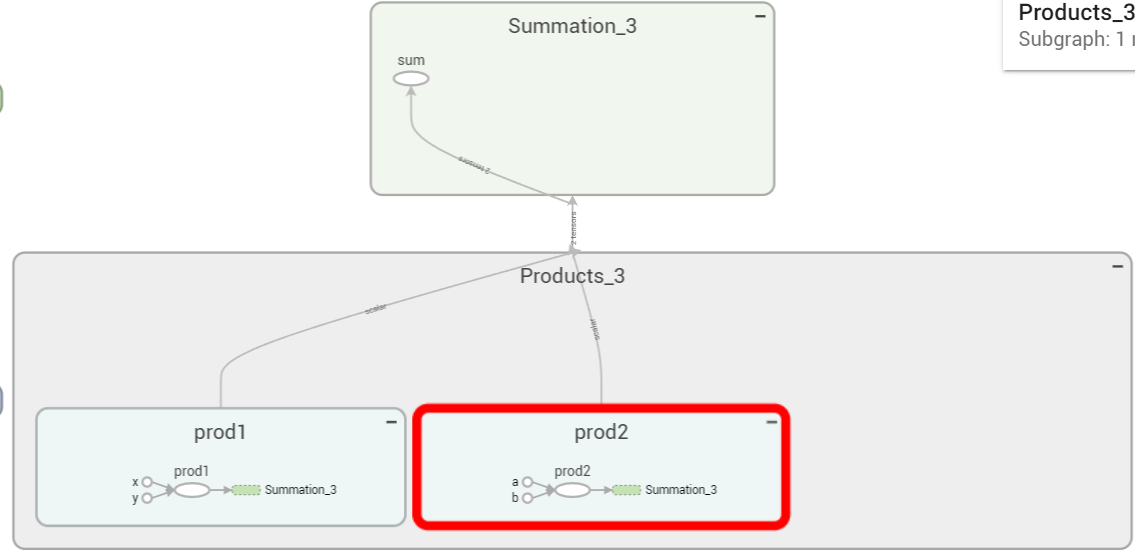

### Enabling Eager Execution

Eager execution in TensorFlow is more Pythonic and allows for rapid
prototyping. Unlike the graph mode, where we need to construct a graph
every time to perform any operations, eager execution follows the imperative
programming paradigm, where any operations can be performed
immediately, without having to create a graph, just like we do in Python.

In [67]:
import tensorflow as tf

print("Eager execution: ", tf.executing_eagerly())

a = tf.constant([[2.0, 3.0], [4.0, 5.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0]])

c = tf.matmul(a, b)
print("Result of matrix multiplication:\n", c)

print("Tensor as NumPy array:\n", c.numpy())


Eager execution:  True
Result of matrix multiplication:
 tf.Tensor(
[[11. 16.]
 [19. 28.]], shape=(2, 2), dtype=float32)
Tensor as NumPy array:
 [[11. 16.]
 [19. 28.]]


### MNIST Digit Classification Using TensorFlow 2.0

We will see how we can perform MNIST handwritten digit
classification, using TensorFlow 2.0. It requires only a few lines of code
compared to TensorFlow 1.x.TensorFlow 2.0 uses
Keras as its high-level API; we just need to add tf.keras to the Keras code.

d:\Coursera_Machineleraning_fullcourse\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.8876 - loss: 0.3785
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.9852 - loss: 0.0492
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9899 - loss: 0.0314
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9927 - loss: 0.0226
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 0.9947 - loss: 0.0158
313/313 - 2s - 7ms/step - accuracy: 0.9901 - loss: 0.0296

Test accuracy: 0.9901000261306763
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


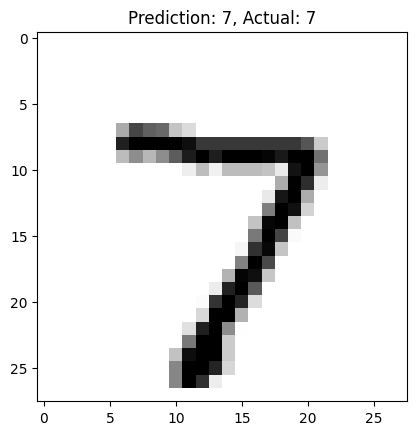

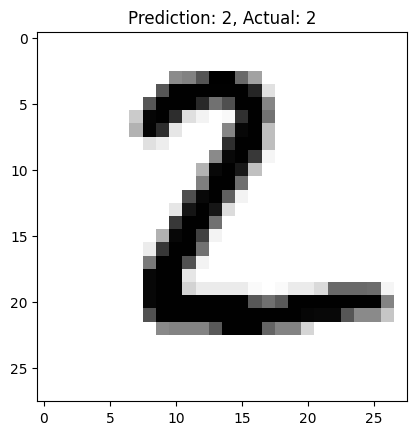

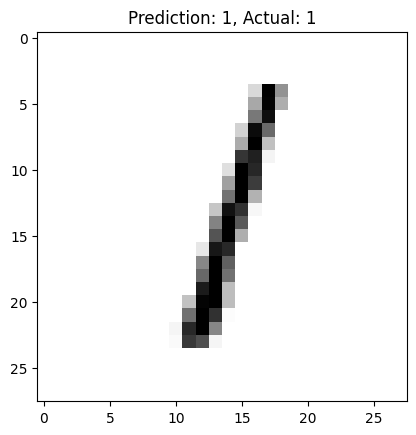

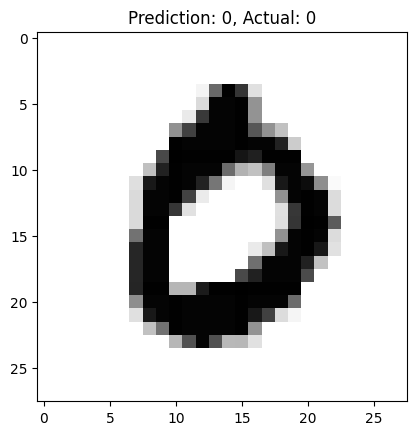

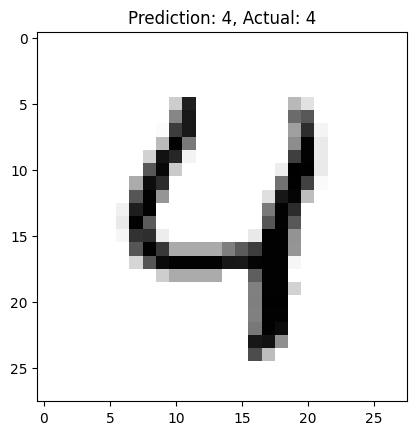

In [2]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Enable eager execution (only necessary if disabled)


# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data (pixel values are between 0 and 255, so we scale them to the range [0, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to add a channel dimension (required for CNNs)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build the CNN model
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the output from the 2D feature maps into a 1D feature vector
    layers.Flatten(),
    
    # Fully connected layer with 128 neurons
    layers.Dense(128, activation='relu'),
    
    # Output layer with 10 neurons (one for each digit, 0-9)
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Predict the first few images in the test set
predictions = model.predict(x_test[:5])

# Plot the first few test images, their predicted labels, and the true labels
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"Prediction: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
    plt.show()


## Math Operations in TensorFlow

Now, we will explore some of the operations in TensorFlow using the eager
execution mode:


In [2]:
x = tf.constant([1., 2., 3.])
y = tf.constant([3., 2., 1.])

In [3]:
# Use tf.add to add two numbers:
sum = tf.add(x,y)
sum.numpy()


array([4., 4., 4.], dtype=float32)

In [4]:
# The tf.subtract function is used for finding the difference between two numbers:

difference = tf.subtract(x,y)
difference.numpy()

array([-2.,  0.,  2.], dtype=float32)

In [5]:
# The tf.multiply function is used for multiplying two numbers:
product = tf.multiply(x,y)
product.numpy()


array([3., 4., 3.], dtype=float32)

In [6]:
# Divide two numbers using tf.divide:
division = tf.divide(x,y)
division.numpy()


array([0.33333334, 1.        , 3.        ], dtype=float32)

In [7]:
# The dot product can be computed as follows:
dot_product = tf.reduce_sum(tf.multiply(x, y))
dot_product.numpy()

10.0

In [8]:
# Next, let's find the index of the minimum and maximum elements:
x = tf.constant([10, 0, 13, 9])
# The index of the minimum value is computed using tf.argmin():
tf.argmin(x).numpy()

In [9]:
# The index of the maximum value is computed using tf.argmax():
tf.argmax(x).numpy()

2

In [10]:
# To find the squared difference between x and y:
x = tf.Variable([1,3,5,7,11])
y = tf.Variable([1])
tf.math.squared_difference(x,y).numpy()


array([  0,   4,  16,  36, 100])

Let's try typecasting; that is, converting from one data type into another.

In [12]:
# Print the type of x:
print (x.dtype)

<dtype: 'int32'>


In [15]:
# We can convert the type of x, which is tf.int32, into tf.float32 using tf.cast, as shown in the following code:
x = tf.cast(x, dtype=tf.float32)
# Now, check the x type. It will be tf.float32, as follows:
print (x.dtype)

<dtype: 'float32'>


Concatenate the two matrices:


In [16]:
x = [[3,6,9], [7,7,7]]
y = [[4,5,6], [5,5,5]]


In [17]:
# Concatenate the matrices row-wise:
tf.concat([x, y], 0).numpy()

array([[3, 6, 9],
       [7, 7, 7],
       [4, 5, 6],
       [5, 5, 5]])

In [18]:
# Use the following code to concatenate the matrices column-wise:
tf.concat([x, y], 1).numpy()

array([[3, 6, 9, 4, 5, 6],
       [7, 7, 7, 5, 5, 5]])

In [19]:
# Stack the x matrix using the stack function:
tf.stack(x, axis=1).numpy()


array([[3, 7],
       [6, 7],
       [9, 7]])

In [20]:
# Now, let' see how to perform the reduce_mean operation:
x = tf.Variable([[1.0, 5.0], [2.0, 3.0]])
x.numpy()

array([[1., 5.],
       [2., 3.]], dtype=float32)

Compute the mean value of x; that is, (1.0 + 5.0 + 2.0 + 3.0) / 4:

In [21]:

tf.reduce_mean(input_tensor=x).numpy()

2.75

In [23]:
# Compute the mean across the row; that is, (1.0+5.0)/2, (2.0+3.0)/2:
tf.reduce_mean(input_tensor=x, axis=0).numpy()

array([1.5, 4. ], dtype=float32)

In [25]:
# Compute the mean across the column; that is, (1.0+5.0)/2.0, (2.0+3.0)/2.0:
tf.reduce_mean(input_tensor=x, axis=1, keepdims=True).numpy()


array([[3. ],
       [2.5]], dtype=float32)

In [27]:
# Draw random values from the probability distributions:
tf.random.normal(shape=(3,2), mean=10.0, stddev=2.0).numpy()

array([[ 8.871997, 13.46481 ],
       [12.133715,  9.891496],
       [12.375104, 14.042315]], dtype=float32)

In [28]:
# Compute the softmax probabilities:
x = tf.constant([7., 2., 5.])
tf.nn.softmax(x).numpy()

array([0.8756006 , 0.00589975, 0.11849965], dtype=float32)

Now, we'll look at how to compute the gradients.

In [30]:
# Define the square function:
def square(x):
    return tf.multiply(x, x)


The gradients can be computed for the preceding square function using
tf.GradientTape, as follows:

In [31]:
with tf.GradientTape(persistent=True) as tape:
    print(square(6.).numpy())

36.0


## TensorFlow 2.0 and Keras

TensorFlow 2.0 has got some really cool features. It sets the eager execution
mode by default. It provides a simplified workflow and uses Keras as the
main API for building deep learning models. It is also backward compatible
with TensorFlow 1.x versions.

Since TensorFlow 2.0 uses Keras as a high-level API, we will look at how
Keras works in the next section.


### Bonjour Keras
Keras is another popularly used deep learning library. It was developed by
François Chollet at Google. It is well known for its fast prototyping, and it
makes model building simple. It is a high-level library, meaning that it does
not perform any low-level operations on its own, such as convolution. It uses
a backend engine for doing that, such as TensorFlow. The Keras API is
available in tf.keras, and TensorFlow 2.0 uses it as the primary API.
Building a model in Keras involves four important steps:
1. Defining the model
2. Compiling the model
3. Fitting the model
4. Evaluating the model


#### Defining the model

The first step is defining the model. Keras provides two different APIs to
define the model:
- The sequential API
- The functional API


#### Defining a sequential model

In [42]:
# In a sequential model, we stack each layer, one above another:

from keras.models import Sequential
from keras.layers import Dense

# First, let's define our model as a Sequential() model, as follows:
model = Sequential()

# Now, define the first layer, as shown in the following code
model.add(Dense(13, input_dim=7, activation='relu'))

# Define the next layer with the relu activation, as follows:
model.add(Dense(7, activation='relu'))

# Define the output layer with the sigmoid activations:
model.add(Dense(1, activation='sigmoid'))

# The final code block of the sequential model is shown as follows. As you can see, the Keras code is much simpler than the TensorFlow code:
model = Sequential()
model.add(Dense(13, input_dim=7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


r:\Neural Networks\envy\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Defining a functional model

A functional model provides more flexibility than a sequential model. For
instance, in a functional model, we can easily connect any layer to another
layer, whereas, in a sequential model, each layer is in a stack of one above
another. A functional model comes in handy when creating complex models,
such as directed acyclic graphs, models with multiple input values, multiple
output values, and shared layers. Now, we will see how to define a
functional model in Keras.

In [63]:
# The first step is to define the input dimensions:
from keras.models import Model
from keras.layers import Input, Dense
import numpy as np

# Convert lists to NumPy arrays
data_test = np.array([[1, 2, 3, 4, 5, 6, 7], [2, 3, 4, 5, 6, 7, 8], [3, 4, 5, 6, 7, 8, 9]])
labels_test = np.array([0, 1, 0])
data = np.array([
    [1, 2, 3, 4, 5, 6, 7],
    [2, 3, 4, 5, 6, 7, 8],
    [3, 4, 5, 6, 7, 8, 9],
    [4, 5, 6, 7, 8, 9, 10],
])
labels = np.array([0, 1, 0, 1])

input = Input(shape=(7,))
layer1 = Dense(10,activation='relu')(input)
layer2 = Dense(1,activation='relu')(layer1)
output = Dense(1, activation='sigmoid')(layer2)
#create the model
model = Model(inputs=input, outputs=output)

#compiling the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

#training the model
model.fit(x=data, y=labels, epochs=100, batch_size=10)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step - accuracy: 0.5000 - loss: 0.7891
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5000 - loss: 0.7669
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5000 - loss: 0.7525
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5000 - loss: 0.7407
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5000 - loss: 0.7298
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5000 - loss: 0.7148
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5000 - loss: 0.7032
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5000 - loss: 0.6967
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5000 - loss: 0.6915
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5000 - loss: 0.6873
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5000 - loss: 0.6839
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5000 - l

In [64]:
# evaluate the model
model.evaluate(x=data_test,y=labels_test)
model.evaluate(x=data, y=labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.6667 - loss: 0.6685
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7500 - loss: 0.6730


[0.6729552745819092, 0.75]